## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pprint import pprint

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
Drug_list=combined_df['Drug Regimen'].unique()
Drug_list.sort()
combined_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
data={'Statistics':('Mean','Median','Variance','Standard Variance', 'Standard Error of Mean'),
      'Values':(combined_df["Tumor Volume (mm3)"].mean(),combined_df["Tumor Volume (mm3)"].median(),
      combined_df["Tumor Volume (mm3)"].var(),combined_df["Tumor Volume (mm3)"].std(),
      combined_df["Tumor Volume (mm3)"].sem())}

pd.DataFrame(data)

#DO IT WITH plt.table


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

,Statistics,Values
0,Mean,50.448381
1,Median,48.951474
2,Variance,79.116074
3,Standard Variance,8.894722
4,Standard Error of Mean,0.204436


## Bar plots

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


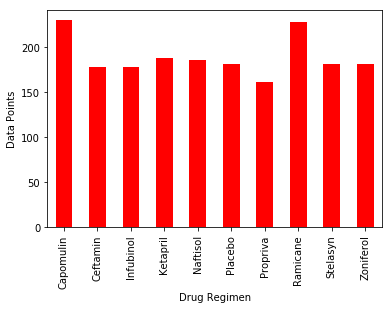

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
group=combined_df.groupby(['Drug Regimen']).count()

bar=group['Timepoint'].plot(kind='bar',legend =False,color = 'r')
bar.set(xlabel="Drug Regimen", ylabel="Data Points")
group


([<matplotlib.axis.XTick at 0x10af27450>,
 <a list of 10 Text xticklabel objects>)

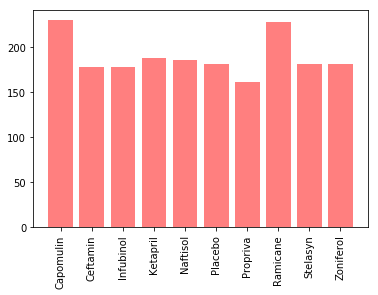

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
 
Y_axis=[x for x in group['Mouse ID']]

x_axis=np.arange(len(Y_axis))
plt.bar(x_axis, Y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_list,rotation='vertical')



## Pie plots

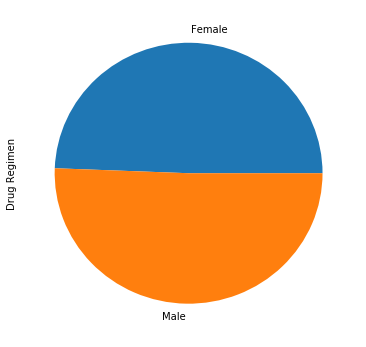

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_m=combined_df.groupby(['Sex']).count()
group_m

group_m.plot(kind='pie', y=['Drug Regimen'],legend=False,figsize=(6, 6))


(-1.3413390227157378,
 1.1201371421759512,
 -1.117970260221657,
 1.285967368976778)

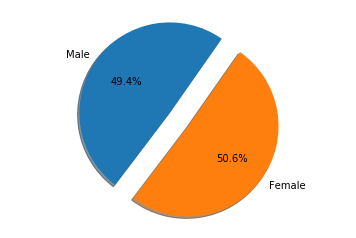

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(group_m['Drug Regimen'],explode=[0.25,0],labels=['Male','Female'],autopct='%1.1f%%',shadow=True,startangle=55)
plt.axis('equal')

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
combined_df.head(15)
group_quart=combined_df.groupby(['Drug Regimen'])
group_quart['Tumor Volume (mm3)'].describe().sort_values(by='mean')


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817


In [8]:
combined_df_reduced=combined_df.loc[:,['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
finaltumorV_df=combined_df_reduced.loc[(combined_df_reduced["Timepoint"]==45)]
finaltumorV_Ramicane=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Ramicane")]
finaltumorV_Ramicane

quartiles = finaltumorV_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ramicane_outlier=finaltumorV_Ramicane.loc[(finaltumorV_Ramicane["Tumor Volume (mm3)"]<lower_bound)]
Ramicane_outlier=finaltumorV_Ramicane.loc[(finaltumorV_Ramicane["Tumor Volume (mm3)"]>upper_bound)]
print(f'Ramicane treatment has {len(Ramicane_outlier)} potential outliers')
if len(Ramicane_outlier)!=0:
    Ramicane_outlier
#print(lower_bound)
#print(upper_bound)

Ramicane treatment has 0 potential outliers


In [9]:
finaltumorV_Capomulin=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Capomulin")]

quartiles = finaltumorV_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_c = lowerq - (1.5*iqr)
upper_bound_c = upperq + (1.5*iqr)

Campomulin_outlier=finaltumorV_Capomulin.loc[(finaltumorV_Capomulin["Tumor Volume (mm3)"]<lower_bound_c)]
Campoulin_outlier=finaltumorV_Capomulin.loc[(finaltumorV_Capomulin["Tumor Volume (mm3)"]>upper_bound_c)]

print(f'Campomulin treatment has {len(Campomulin_outlier)} potential outliers')
if len(Campomulin_outlier)!=0:
    Campomulin_outlier
#print(lower_bound_c)
#print(upper_bound_c)

Campomulin treatment has 0 potential outliers


In [10]:
finaltumorV_Infubinol=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Infubinol")]


quartiles = finaltumorV_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_I = lowerq - (1.5*iqr)
upper_bound_I = upperq + (1.5*iqr)


Infubinol_outlier=finaltumorV_Infubinol.loc[(finaltumorV_Infubinol["Tumor Volume (mm3)"]<lower_bound_I)]
Infubinol_outlier=finaltumorV_Infubinol.loc[(finaltumorV_Infubinol["Tumor Volume (mm3)"]>upper_bound_I)]

print(f'Propriva treatment has {len(Infubinol_outlier)} potential outliers')
if len(Infubinol_outlier)!=0:
    Infubinol_outlier

Propriva treatment has 0 potential outliers


In [11]:
finaltumorV_Ceftamin=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Ceftamin")]


quartiles = finaltumorV_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_cf = lowerq - (1.5*iqr)
upper_bound_cf = upperq + (1.5*iqr)

Ceftamin_outlier=finaltumorV_Ceftamin.loc[(finaltumorV_Ceftamin["Tumor Volume (mm3)"]<lower_bound_cf)]
Ceftamin_outlier=finaltumorV_Ceftamin.loc[(finaltumorV_Ceftamin["Tumor Volume (mm3)"]>upper_bound_cf)]

print(f'Ceftamin treatment has {len(Ceftamin_outlier)} potential outliers')
if len(Ceftamin_outlier)!=0:
    Ceftamin_outlier

Ceftamin treatment has 0 potential outliers


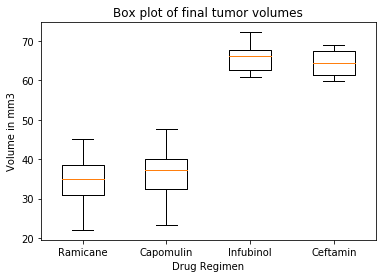

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ramicane_tv=[]
Capomulin_tv=[]
Infubinol_tv=[]
Ceftamin_tv=[]


for x in finaltumorV_Ramicane["Tumor Volume (mm3)"]:
    Ramicane_tv.append(x)
for x in finaltumorV_Capomulin["Tumor Volume (mm3)"]:
    Capomulin_tv.append(x)
for x in finaltumorV_Infubinol["Tumor Volume (mm3)"]:
    Infubinol_tv.append(x)
for x in finaltumorV_Ceftamin["Tumor Volume (mm3)"]:
    Ceftamin_tv.append(x)

final_data=[Ramicane_tv,Capomulin_tv,Infubinol_tv,Ceftamin_tv]

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of final tumor volumes')
ax1.set_ylabel('Volume in mm3')
ax1.boxplot(final_data, widths = 0.5)
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(['Ramicane','Capomulin','Infubinol','Ceftamin'])

plt.show()

## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen